# Proyecto #1

## 1. Paquete

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
filepath = 'A:\Documents\Galileo\Data science AWS\Proyecto final\proyecto_data\proyecto_training_data.npy'
df = np.load(filepath)

In [4]:
print(df)

[[2.08500e+05 7.00000e+00 8.56000e+02 8.00000e+00 2.00300e+03 6.50000e+01]
 [1.81500e+05 6.00000e+00 1.26200e+03 6.00000e+00 1.97600e+03 8.00000e+01]
 [2.23500e+05 7.00000e+00 9.20000e+02 6.00000e+00 2.00100e+03 6.80000e+01]
 ...
 [2.66500e+05 7.00000e+00 1.18800e+03 9.00000e+00 1.94100e+03 6.60000e+01]
 [1.42125e+05 5.00000e+00 1.07800e+03 5.00000e+00 1.95000e+03 6.80000e+01]
 [1.47500e+05 5.00000e+00 1.25600e+03 6.00000e+00 1.96500e+03 7.50000e+01]]


## 2. Separar el df

In [5]:
subset80 = df[:80]
subset20 = df[-20:]

In [6]:
training = pd.DataFrame(subset80)

In [7]:
training.columns = ['Y', 'X1','X2','X3','X4','X5']

## 3. Análisis exploratorio

In [8]:
for i in training.columns:
    print(i)
    print(training[i].describe())
    print(f'Peak to peak', np.ptp(training[i]))
    
    

Y
count        80.000000
mean     178395.200000
std       76158.259927
min       40000.000000
25%      129900.000000
50%      153500.000000
75%      220500.000000
max      438780.000000
Name: Y, dtype: float64
Peak to peak 398780.0
X1
count    80.00000
mean      6.08750
std       1.56054
min       3.00000
25%       5.00000
50%       6.00000
75%       7.00000
max      10.00000
Name: X1, dtype: float64
Peak to peak 7.0
X2
count      80.00000
mean     1163.87500
std       357.13733
min       520.00000
25%       901.50000
50%      1107.50000
75%      1344.25000
max      2223.00000
Name: X2, dtype: float64
Peak to peak 1703.0
X3
count    80.000000
mean      6.312500
std       1.437242
min       4.000000
25%       5.000000
50%       6.000000
75%       7.000000
max      11.000000
Name: X3, dtype: float64
Peak to peak 7.0
X4
count      80.000000
mean     1971.550000
std        28.579403
min      1910.000000
25%      1954.750000
50%      1970.000000
75%      2002.250000
max      2007.000000
Nam

## 4. Histogramas

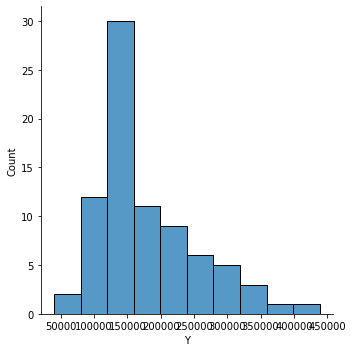

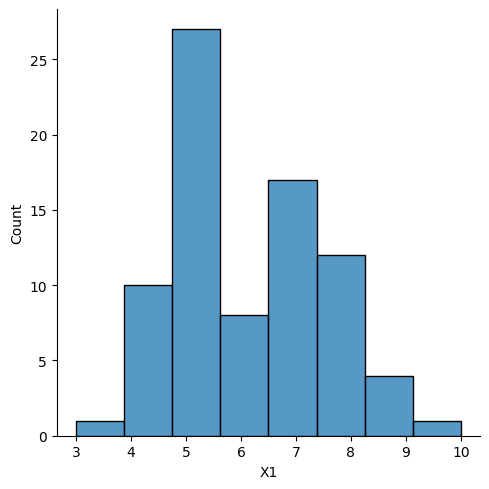

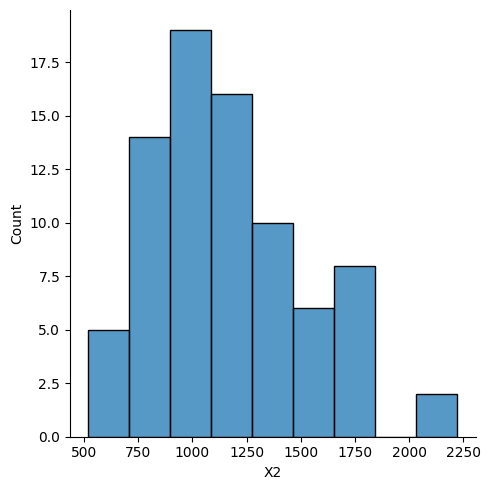

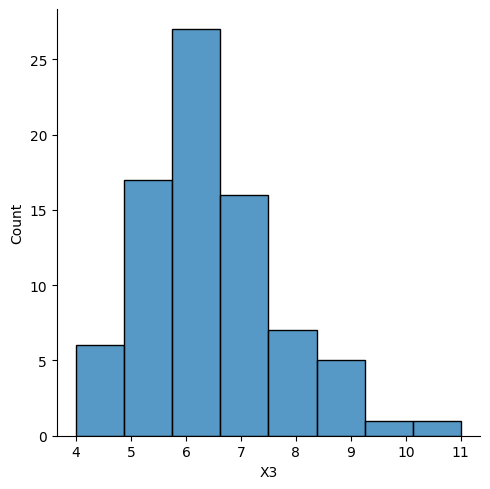

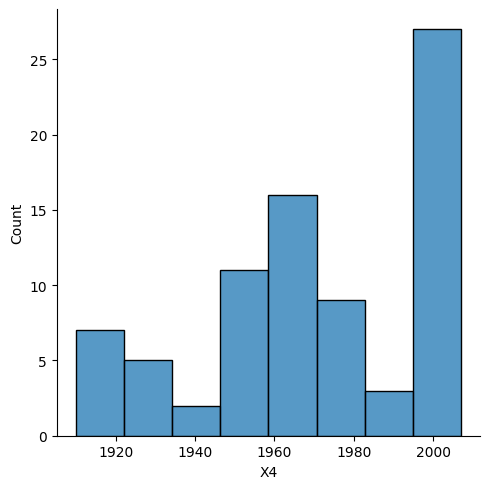

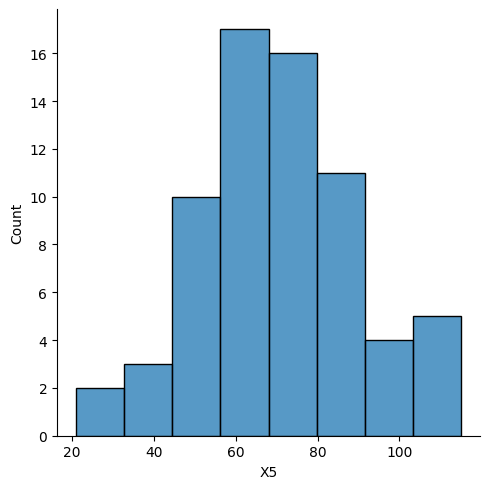

In [9]:
for i in training.columns:
    sns.displot(training[i])
    

## 5. Correlación

In [10]:
training.head()

,Y,X1,X2,X3,X4,X5
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


In [11]:
correlations = training.corrwith(training['Y'])

In [12]:
correlations

Y     1.000000
X1    0.853355
X2    0.574489
X3    0.576696
X4    0.684769
X5    0.368720
dtype: float64

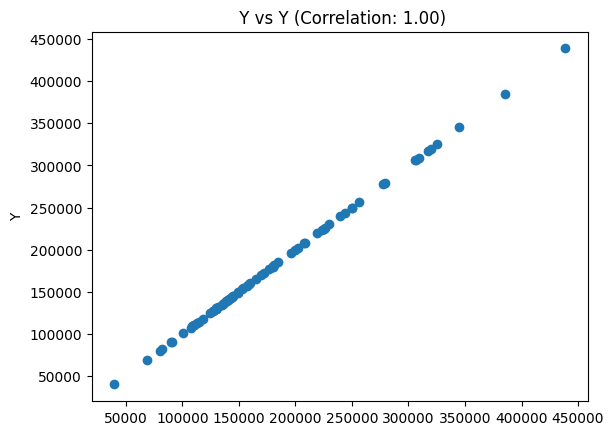

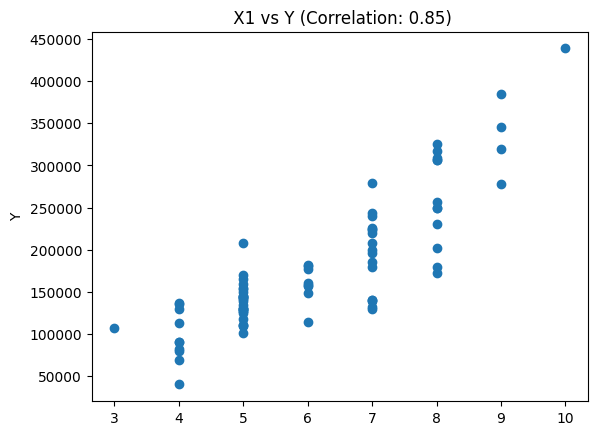

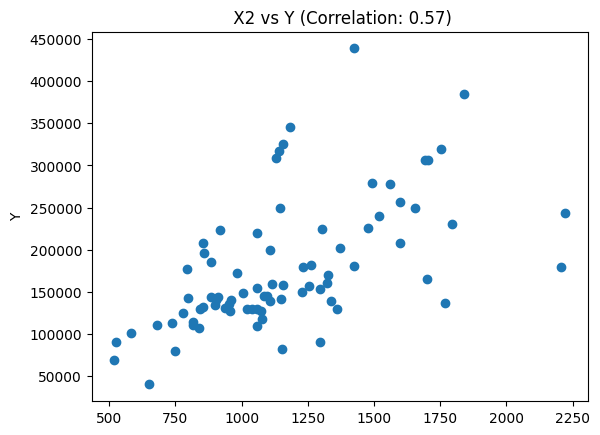

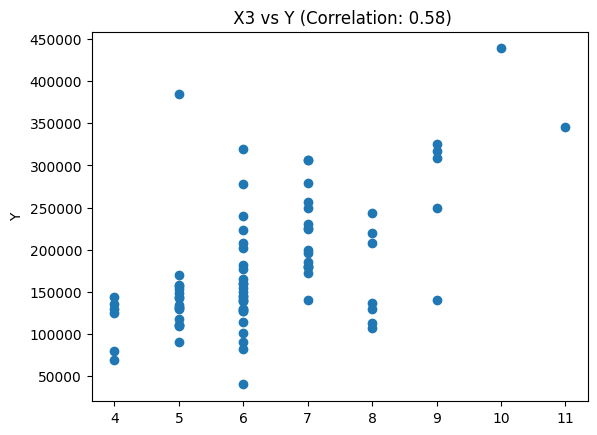

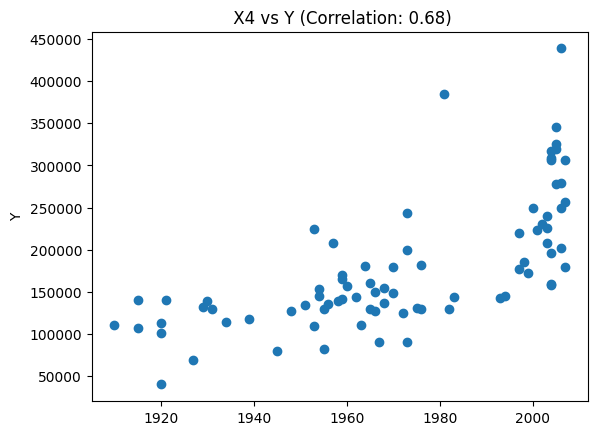

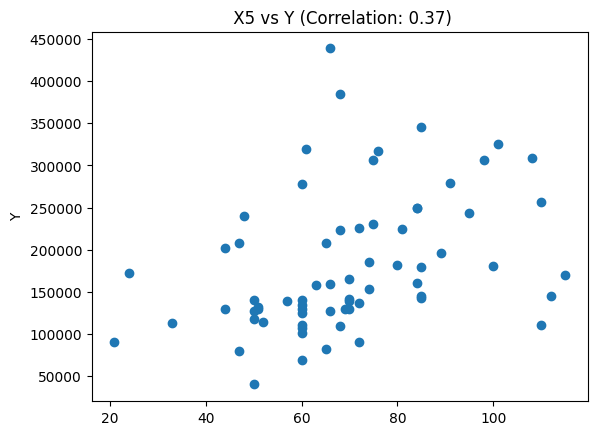

In [13]:
for i in training.columns:
    plt.scatter(training[i], training['Y'])
    plt.title(f' {i} vs Y (Correlation: {correlations[i]:.2f})')
    plt.ylabel('Y')
    plt.show()

In [14]:
print(f'Se decide elegir las variables X1 y X4')

Se decide elegir las variables X1 y X4


## 6. Función para entrar un modelo de regresión lineal.

In [15]:
y = training['Y']
x1 = training['X1']
x4 = training['X4']

In [68]:
def gradient_descent(b1, b0, points, l):
    beta1_gradiente = 0
    beta0_gradiente = 0

    n = len(points)

    for i in range(n):
        x = points.iloc[i].X1
        y = points.iloc[i].Y

        beta1_gradiente += -(2/n) * x * (y - (b1 * x + b0))
        beta0_gradiente += -(2/n) * (y - (b1 * x + b0))

        m = b1 - beta1_gradiente * l
        b = b0 - beta0_gradiente * l

        return m, b
    
 

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
3430.1166802026883 490.0166686003836


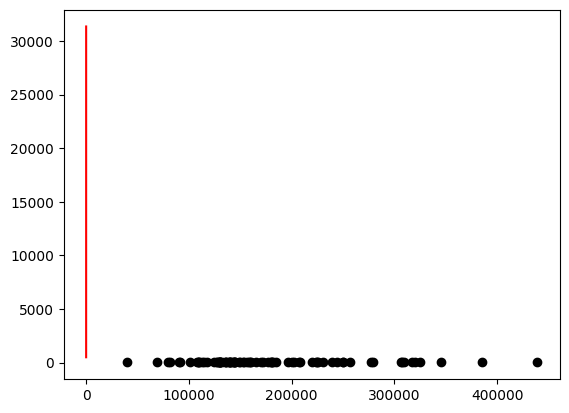

In [76]:
m = 0
b = 0
l = 0.0001
epochs = 1000

for i in range(epochs):
    if i % 50 == 0:
        print(i)
    m, b = gradient_descent(m, b, training,l)

print(m,b)

plt.scatter(y, x1, color = 'black')
plt.plot(list(range(0,10)), [m * x1 + b for x1 in range(0,10)], color = 'red')
plt.show()

<bound method NDFrame.describe of 0     7.0
1     6.0
2     7.0
3     7.0
4     8.0
     ... 
75    4.0
76    4.0
77    5.0
78    4.0
79    5.0
Name: X1, Length: 80, dtype: float64>

In [47]:
def train_linear_regression(x, y, epochs, print_error_each, alpha):
    
    beta0 = 0
    beta1 = 0
    
   
    m = len(x)
    
    
    for epoch in range(epochs):
        
        y_pred = beta0 + beta1 * x
        
        
        error = np.mean((y_pred - y) ** 2)
        
        
        beta0 -= alpha * (1/m) * np.sum(y_pred - y)
        beta1 -= alpha * (1/m) * np.sum((y_pred - y) * x)
        
        
        if epoch % print_error_each == 0:
            print(f"Iteración {epoch}: Error = {error}")
    
    
    return beta0, beta1


In [48]:
beta0, beta1 = train_linear_regression(x1, y, epochs=10, print_error_each=10, alpha=0.0001)
print("Parámetros entrenados:")
print("beta0:", beta0)
print("beta1:", beta1)

Iteración 0: Error = 37552426931.2
Parámetros entrenados:
beta0: 175.10128220136403
beta1: 1164.8109158586024


## 7. Entrenar el modelo

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [26]:
# Vector de datos x
x1m = np.array(x1)
x4m = np.array(x4)

# Crear una matriz de 2 columnas
m1 = np.column_stack((x1m, np.ones_like(x1m)))
m4 = np.column_stack((x4m, np.ones_like(x4m)))


In [20]:
X1_train, X4_train, y_train

RMSE del modelo y el de SKIT

EL mimo 20% en los 2 test de data 

El que tenga menos error gana

Las predicciones que se haga con el modelo es propia 



SyntaxError: invalid syntax (3270495366.py, line 3)